In [1]:
print("hello")

hello


In [2]:
import sys
sys.version_info

sys.version_info(major=3, minor=12, micro=5, releaselevel='final', serial=0)

In [3]:
import plotly.io
plotly.io.renderers.default = "notebook_connected+plotly_mimetype"

In [4]:
import malariagen_data

In [5]:
ag3 = malariagen_data.Ag3(
    results_cache="results_cache",
)
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release_master_us_central1
Data releases available : 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 3.10, 3.11
Results cache           : /home/jupyter/alimanfoo.github.io/src/YYYY-MM-DD-burkina-longitudinal/results_cache
Cohorts analysis        : 20240717
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 13.0.0
Client location         : Iowa, United States (Google Cloud us-central1)
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact support@malariagen.net. For API documentation see 
https://malariagen.github.io/malariagen-data-python/v13.0.0/Ag3.html

In [6]:
# Hide progress for the blog post.
# ag3._show_progress = False

## Sample selection

In [7]:
df_samples = ag3.sample_metadata()

In [8]:
df_samples.query("country == 'Burkina Faso'").groupby(["sample_set", "contributor", "year"]).size()

sample_set                        contributor         year
1191-VO-MULTI-OLOUGHLIN-VMF00106  Austin Burt         2014     31
1191-VO-MULTI-OLOUGHLIN-VMF00140  Austin Burt         2014    195
                                                      2015    412
                                                      2016    286
                                                      2017    202
1296-VO-BF-DIABATE-VMF00272       Abdoulaye Diabate   2020      3
                                                      2021     31
                                                      2022    631
1314-VO-BF-KIENTEGA-KIMA-BF-2104  Mahamadi Kientega   2017     41
                                                      2018     43
                                                      2019     95
AG1000G-BF-A                      Austin Burt         2012    181
AG1000G-BF-B                      Austin Burt         2014    102
AG1000G-BF-C                      Nora Besansky       2004     13
crawford-2016    

In [26]:
sample_sets = [
    "AG1000G-BF-A",
    "AG1000G-BF-B",
    "1191-VO-MULTI-OLOUGHLIN-VMF00106",
    "1191-VO-MULTI-OLOUGHLIN-VMF00140",
]
sample_query = "country == 'Burkina Faso'"

In [27]:
ag3.count_samples(
    sample_sets=sample_sets,
    sample_query=sample_query,
)

taxon                                                   arabiensis  coluzzii  \
country      admin1_iso admin1_name   admin2_name year                         
Burkina Faso BF-09      Hauts-Bassins Houet       2012           0        82   
                                                  2014          12       146   
                                                  2015          88       183   
                                                  2016          14       167   
                                                  2017           1       164   

taxon                                                   gambiae  unassigned  
country      admin1_iso admin1_name   admin2_name year                       
Burkina Faso BF-09      Hauts-Bassins Houet       2012       99           0  
                                                  2014      168           2  
                                                  2015      140           1  
                                                  2016      104           1  
                                                  2017       37           0

## Changes in pyrethroid target-site resistance

In [28]:
vgsc_transcript = "AGAP004707-RD"

In [36]:
ds_colu_vgsc_aa_frq = ag3.aa_allele_frequencies_advanced(
    transcript=vgsc_transcript,
    area_by="admin1_name",
    period_by="year",
    sample_sets=sample_sets,
    sample_query="country == 'Burkina Faso' and taxon == 'coluzzii'",
    variant_query="max_af >= 0.05",
)
ds_colu_vgsc_aa_frq

Load SNP genotypes:   0%|          | 0/208 [00:00<?, ?it/s]

Compute SNP allele frequencies:   0%|          | 0/5 [00:00<?, ?it/s]

Compute SNP effects:   0%|          | 0/20892 [00:00<?, ?it/s]

<xarray.Dataset> Size: 3kB
Dimensions:                 (cohorts: 5, variants: 9)
Dimensions without coordinates: cohorts, variants
Data variables: (12/31)
    cohort_area             (cohorts) object 40B 'Hauts-Bassins' ... 'Hauts-B...
    cohort_label            (cohorts) object 40B 'Hauts-Bassins_colu_2012' .....
    cohort_lat_max          (cohorts) float64 40B 11.24 11.24 11.24 11.24 11.24
    cohort_lat_mean         (cohorts) float64 40B 11.22 11.24 11.24 11.24 11.24
    cohort_lat_min          (cohorts) float64 40B 11.15 11.23 11.23 11.23 11.23
    cohort_lon_max          (cohorts) float64 40B -4.235 -4.235 ... -4.235
    ...                      ...
    variant_label           (variants) object 72B 'V402L (2L:2,391,228 G>{C,T...
    variant_max_af          (variants) float64 72B 0.3323 0.8659 ... 0.122
    variant_position        (variants) int32 36B 2391228 2422652 ... 2431061
    variant_ref_aa          (variants) object 72B 'V' 'L' 'I' ... 'P' 'P' 'A'
    variant_ref_allele      (variants) object 72B 'G' 'A' 'T' ... 'C' 'C' 'C'
    variant_transcript      (variants) object 72B 'AGAP004707-RD' ... 'AGAP00...
Attributes:
    title:    AGAP004707-RD (Vgsc/para) SNP frequencies

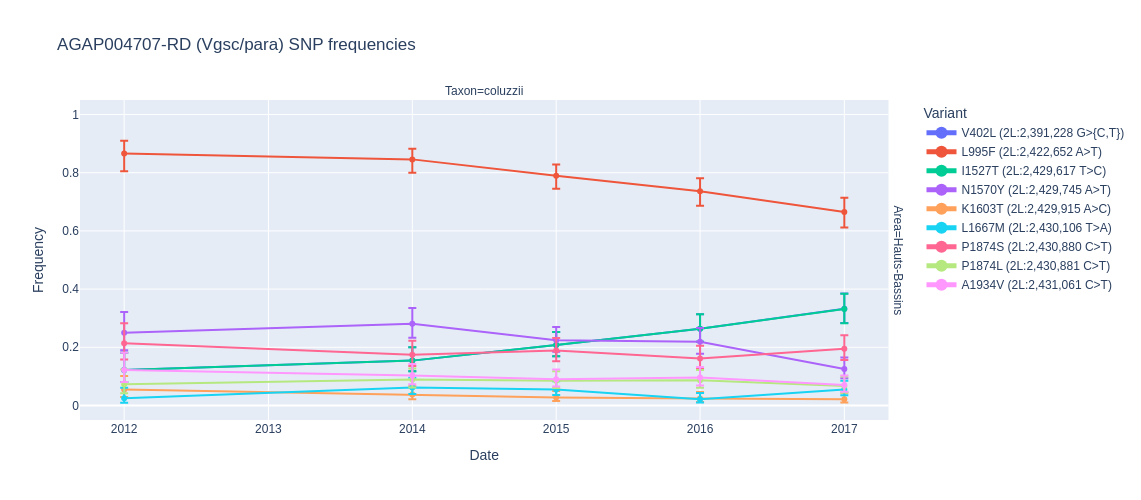

In [37]:
ag3.plot_frequencies_time_series(
    ds_colu_vgsc_aa_frq,
    height=500,
    width=700,
)

* Interesting that N1570Y is declining, even though we know much higher resistance.
* But P1874S is not declining, holding it's own against V402L+I1527T, suggesting comparable selection coefficient.

Load genotypes for heterozygosity calculation:   0%|          | 0/298 [00:00<?, ?it/s]

Load SNP genotypes:   0%|          | 0/208 [00:00<?, ?it/s]

Compute SNP effects:   0%|          | 0/209001 [00:00<?, ?it/s]

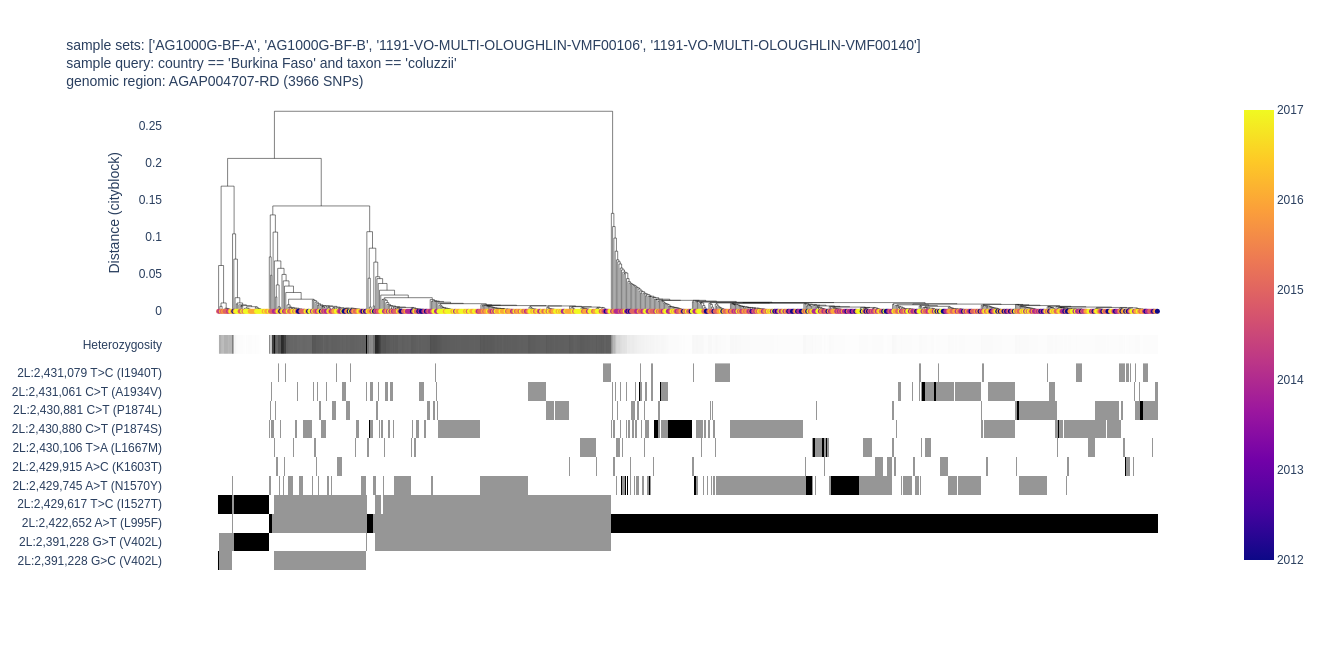

In [43]:
ag3.plot_diplotype_clustering_advanced(
    region=vgsc_transcript,
    sample_sets=sample_sets,
    sample_query="country == 'Burkina Faso' and taxon == 'coluzzii'",
    site_mask="gamb_colu",
    color="year",
    linkage_method="complete",
    snp_transcript=vgsc_transcript,
    snp_filter_min_maf=0.03,
)

## Genome-wide scan for allele frequency changes

In [ ]:
ag3.plot_fst_gwss(
    contig="23X",
    window_size=2_000,
    cohort1_query="country == 'Burkina Faso' and taxon == 'coluzzii' and year == 2012",
    cohort2_query="country == 'Burkina Faso' and taxon == 'coluzzii' and year == 2017",
    sample_sets=sample_sets,
    site_mask="gamb_colu",
    max_cohort_size=None,
)

Compute SNP allele counts:   0%|          | 0/18048 [00:00<?, ?it/s]

Compute SNP allele counts:   0%|          | 0/24816 [00:00<?, ?it/s]

In [44]:
ag3.plot_fst_gwss?

Signature:
ag3.plot_fst_gwss(
    contig: str,
    window_size: int,
    cohort1_query: str,
    cohort2_query: str,
    sample_sets: Union[str, Sequence[str], NoneType] = None,
    site_mask: Optional[str] = 'default',
    cohort_size: Optional[int] = None,
    min_cohort_size: Optional[int] = 15,
    max_cohort_size: Optional[int] = 50,
    random_seed: int = 42,
    title: Union[str, bool, NoneType] = None,
    sizing_mode: Literal['fixed', 'stretch_width', 'stretch_height', 'stretch_both', 'scale_width', 'scale_height', 'scale_both'] = 'stretch_width',
    width: Optional[int] = None,
    track_height: int = 190,
    genes_height: int = 90,
    show: bool = True,
    output_backend: Literal['canvas', 'webgl', 'svg'] = 'webgl',
    clip_min: Optional[float] = 0.0,
) -> Optional[bokeh.model.model.Model]
Docstring:
Run and plot a Fst genome-wide scan to investigate genetic
differentiation between two cohorts.

Parameters
----------
contig : str
    Reference genome contig name. See th